In [66]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt # for data visualization
import seaborn as sns # for statistical data visualization
%matplotlib inline

from sklearn.preprocessing import LabelEncoder

from dataset_dir import excel_dir,stata_dir

import warnings
warnings.filterwarnings('ignore')

pd.io.formats.excel.ExcelFormatter.header_style = None
pd.options.display.max_rows = None
pd.options.display.max_columns = None
r=pd.read_stata(stata_dir()+"Teamup_women_Dataset_Lagos.dta",convert_categoricals=False)
r=r[r['level2']==7]

data=r.copy()
cut_starting=list(data.columns[:26])
cut_ending=list(data.columns[-23:])
for i,j in enumerate(cut_ending):
    if(j=="instanceid"):
        del cut_ending[i]
    

for c in cut_starting:
    del data[c]
for c in cut_ending:
    del data[c]

df=data.copy()

# Exploratory data analysis

df.shape

df.info()

# Drop redundant features

red=[]
for i in df.columns:
    if(df[i].isnull().sum()==df.shape[0]):
        red.append(i)
for i in red:
    del df[i]

df.shape

# fill missing values with special number

for i in df.columns:
    df[i]=df[i].fillna(-91)

df.shape

y=pd.read_excel(excel_dir()+"y.xlsx")

y_ids=y['Respondent ID']

a=df[df['resp_select'].isin(y_ids)]
b=df[~df['resp_select'].isin(y_ids)]

b.shape[0]+a.shape[0]

target=y[['Respondent ID','profile']]
target['resp_select']=y['Respondent ID']
del target['Respondent ID']

m=pd.merge(a,target,how='right',on='resp_select')

m.shape

# declare vector and target variables

del m['res_name']
del m['ward']
del m['hh_name']
del m['q102']
del m['q106_cal']
del m['q211_strategy1']
del m['instanceid']
del m['resp_select']
del m['strat_lab1']

for i in m.columns:
    if(i[0]=="v"):
        del m[i]
for i in m.columns:
    if('strategy' in i):
        del m[i]
for i in m.columns:
    if('cal' in i):
        del m[i]
for i in m.columns:
    if('lab' in i):
        del m[i]
m=m.replace('',-91)
for i in m.columns:
    if(i!='profile'):
        if(m[i].dtype=='object'):
            del m[i]

for i in m.columns:
    if(i!='profile'):
        m[i]=m[i].astype(int)   
cols_ren=[]
for col in m.columns:
    aa=m[col].value_counts().keys()
    bb=m[col].value_counts().values
    for i,j in zip(aa,bb):
        if((i==0)&(j==m.shape[0])):
            cols_ren.append(col)

cols_ren2=[]
for col in m.columns:
    aa=m[col].value_counts().keys()
    bb=m[col].value_counts().values
    for i,j in zip(aa,bb):
        if((i==-91)&(j==m.shape[0])):
            cols_ren2.append(col)

for i in cols_ren:
    m=m.drop(i,axis=1)

for i in cols_ren2:
    m=m.drop(i,axis=1)
le = LabelEncoder()

m['profile'] = le.fit_transform(m['profile'])



<class 'pandas.core.frame.DataFrame'>
Int64Index: 760 entries, 0 to 2287
Columns: 10470 entries, resp_select to instanceid
dtypes: float64(1449), int8(8749), object(272)
memory usage: 16.3+ MB


In [55]:
cols_ren=[]
for col in m.columns:
    aa=m[col].value_counts().keys()
    bb=m[col].value_counts().values
    for i,j in zip(aa,bb):
        if((i==0)&(j==m.shape[0])):
            cols_ren.append(col)

cols_ren2=[]
for col in m.columns:
    aa=m[col].value_counts().keys()
    bb=m[col].value_counts().values
    for i,j in zip(aa,bb):
        if((i==-91)&(j==m.shape[0])):
            cols_ren2.append(col)

for i in cols_ren:
    m=m.drop(i,axis=1)

for i in cols_ren2:
    m=m.drop(i,axis=1)

In [67]:
m.shape

(107, 881)

In [85]:
for i in X.columns:
    print(X[i].value_counts())

0    88
1    19
Name: q12, dtype: int64
1    86
0    13
2     4
3     3
4     1
Name: q13, dtype: int64
5     10
15     9
17     8
22     7
19     6
7      6
14     6
24     5
6      5
0      5
2      4
18     4
10     3
13     3
20     3
1      3
21     3
8      2
3      2
25     2
9      2
23     2
16     2
4      2
26     1
11     1
12     1
Name: q101, dtype: int64
5     10
15     9
17     8
22     7
19     6
7      6
14     6
24     5
6      5
0      5
2      4
18     4
10     3
13     3
20     3
1      3
21     3
8      2
3      2
25     2
9      2
23     2
16     2
4      2
26     1
11     1
12     1
Name: ageyr, dtype: int64
1    106
0      1
Name: q105, dtype: int64
2    57
3    48
0     1
1     1
Name: q106, dtype: int64
5    45
3    25
2    16
1    14
4     6
0     1
Name: q106b, dtype: int64
1    95
0    12
Name: q107, dtype: int64
4    59
8    16
2     8
7     7
9     5
1     4
0     3
5     3
6     1
3     1
Name: q108, dtype: int64
1    55
2    39
0    13
Name: q109, dty

In [83]:
X = m.drop(['profile'], axis=1)
y = m['profile']

In [84]:
for i in X.columns:
    X[i] = le.fit_transform(X[i])


In [86]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.33, random_state = 42)

In [87]:
# check the shape of X_train and X_test
X_train.shape, X_test.shape

((71, 880), (36, 880))

In [90]:
from sklearn.tree import DecisionTreeClassifier

Model accuracy score with criterion gini index: 0.7222
Training set score: 0.8732
Test set score: 0.7222


[Text(0.375, 0.875, 'X[252] <= 0.5\ngini = 0.663\nsamples = 71\nvalue = [20, 25, 26]'),
 Text(0.25, 0.625, 'gini = 0.0\nsamples = 25\nvalue = [0, 25, 0]'),
 Text(0.5, 0.625, 'X[278] <= 1.5\ngini = 0.491\nsamples = 46\nvalue = [20, 0, 26]'),
 Text(0.25, 0.375, 'X[259] <= 2.5\ngini = 0.389\nsamples = 34\nvalue = [9, 0, 25]'),
 Text(0.125, 0.125, 'gini = 0.0\nsamples = 16\nvalue = [0, 0, 16]'),
 Text(0.375, 0.125, 'gini = 0.5\nsamples = 18\nvalue = [9, 0, 9]'),
 Text(0.75, 0.375, 'X[49] <= 1.5\ngini = 0.153\nsamples = 12\nvalue = [11, 0, 1]'),
 Text(0.625, 0.125, 'gini = 0.0\nsamples = 11\nvalue = [11, 0, 0]'),
 Text(0.875, 0.125, 'gini = 0.0\nsamples = 1\nvalue = [0, 0, 1]')]

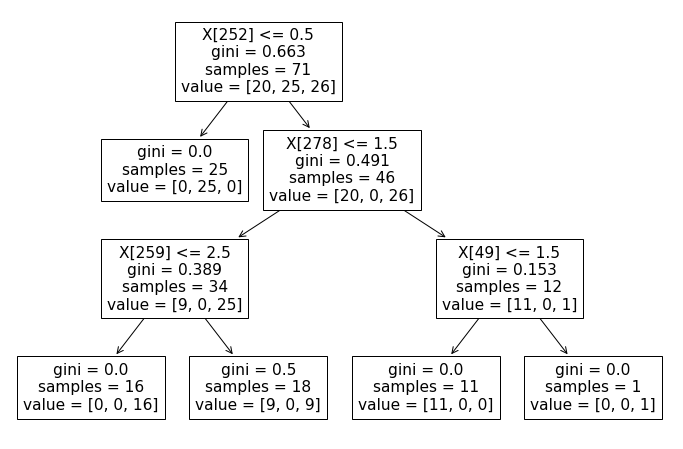

In [99]:
# instantiate the DecisionTreeClassifier model with criterion gini index

clf_gini = DecisionTreeClassifier(criterion='gini', max_depth=3, random_state=0)


# fit the model
clf_gini.fit(X_train, y_train)

y_pred_gini = clf_gini.predict(X_test)

from sklearn.metrics import accuracy_score
print('Model accuracy score with criterion gini index: {0:0.4f}'. format(accuracy_score(y_test, y_pred_gini)))

print('Training set score: {:.4f}'.format(clf_gini.score(X_train, y_train)))
print('Test set score: {:.4f}'.format(clf_gini.score(X_test, y_test)))

plt.figure(figsize=(12,8))

from sklearn import tree

tree.plot_tree(clf_gini.fit(X_train, y_train)) 

Model accuracy score with criterion gini index: 0.8056
Training set score: 0.8732
Test set score: 0.8056


[Text(0.3333333333333333, 0.875, 'X[252] <= 0.5\nentropy = 1.576\nsamples = 71\nvalue = [20, 25, 26]'),
 Text(0.16666666666666666, 0.625, 'entropy = 0.0\nsamples = 25\nvalue = [0, 25, 0]'),
 Text(0.5, 0.625, 'X[228] <= 1.5\nentropy = 0.988\nsamples = 46\nvalue = [20, 0, 26]'),
 Text(0.3333333333333333, 0.375, 'entropy = 0.0\nsamples = 12\nvalue = [0, 0, 12]'),
 Text(0.6666666666666666, 0.375, 'X[287] <= 0.5\nentropy = 0.977\nsamples = 34\nvalue = [20, 0, 14]'),
 Text(0.5, 0.125, 'entropy = 0.966\nsamples = 23\nvalue = [9, 0, 14]'),
 Text(0.8333333333333334, 0.125, 'entropy = 0.0\nsamples = 11\nvalue = [11, 0, 0]')]

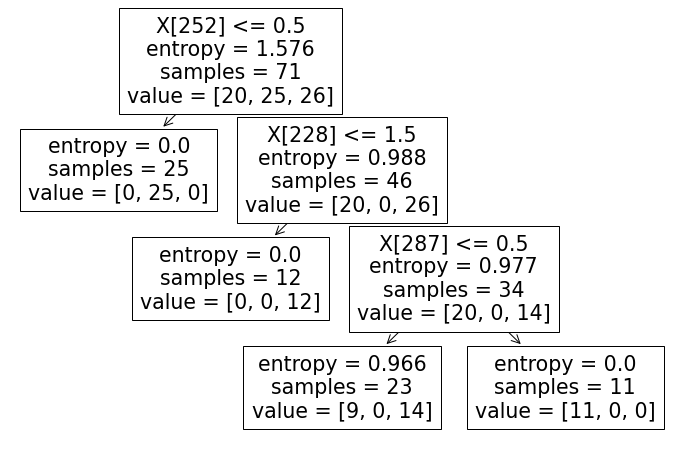

In [104]:
# instantiate the DecisionTreeClassifier model with criterion gini index

clf_en = DecisionTreeClassifier(criterion='entropy', max_depth=3, random_state=0)


# fit the model
clf_en.fit(X_train, y_train)

y_pred_en = clf_en.predict(X_test)

from sklearn.metrics import accuracy_score
print('Model accuracy score with criterion gini index: {0:0.4f}'. format(accuracy_score(y_test, y_pred_en)))

print('Training set score: {:.4f}'.format(clf_en.score(X_train, y_train)))
print('Test set score: {:.4f}'.format(clf_en.score(X_test, y_test)))

plt.figure(figsize=(12,8))

from sklearn import tree

tree.plot_tree(clf_en.fit(X_train, y_train)) 

In [105]:
# Print the Confusion Matrix and slice it into four pieces

from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred_en)

print('Confusion matrix\n\n', cm)

Confusion matrix

 [[ 4  0  0  3]
 [ 0 14  0  0]
 [ 0  2  0  0]
 [ 2  0  0 11]]


In [107]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred_en))

              precision    recall  f1-score   support

           0       0.67      0.57      0.62         7
           1       0.88      1.00      0.93        14
           2       0.00      0.00      0.00         2
           3       0.79      0.85      0.81        13

    accuracy                           0.81        36
   macro avg       0.58      0.60      0.59        36
weighted avg       0.75      0.81      0.78        36

